## 拟合的力道


1. 拟合与过拟合
2. 对抗过拟合：
    * 交叉检验
    * 正则化L1,L2

3. python实现
4. pipeline
5. 回忆一下方差的分解：
    * 离差平方总和 = 回归平方和+残差平方和 （ SST = SSR + SSE ）
6. bias and variance分解（这里的bias和variance跟过拟合的bias和variance不一样）-- HARD!!! for student with strong background (e.g. have taken Andrew Ng's ML course)

## 1. 拟合与过拟合

* 在训练模型时，涉及到选择与比较不同的模型在训练集和测试集的预测结果
* 这里有Bias与Variance
* **拟合**：
    * 抓住**主要**特征，主要规律，主要趋势，可用于同一总体的其他采样样本的结果预测
    

<img src='Graph02.gif',width=400>

* 欠拟合：
    * 模型不够复杂，漏掉了部分数据规律
    * high bias-- bias is the distance between training error/test error (converged) and best error (最佳误差水平) (图二); 对应的图三是处于左侧的竖线那里
    * 增加模型复杂度
<img src='under_fitting.png',width=800>

* 过拟合：
    * 模型过于复杂，把样本的部分随机误差当作了总体的数据规律，并用模型进行解释。这部分解释并不能推广到总体分布的其他样本中。
    * high variance-- when change data set(e.g. using test data set to test), it will have a huge error difference from training set (图二)-- variance; 对应图三的右边的竖线 
    * 减少不必要的模型复杂度
<img src='over_fitting.png',width=800>

## 2. 对抗过拟合-- Methods to prevent overfitting
* 1.交叉检验-cross validation
* 2.正则化(regularization)
     * L1
     * L2

* 1. 从验证训练结果入手：cross-validation
    - Different from fitting method above (training set and testing set). But divide whole dataset to multiple sets (e.g. 10 sets), using one set a time as validation set and the rest sets are training set; do this 10 times, the pick average of accuracy as the final accuracy.

<img src='cv.png',width=700>

* 2.从限制模型复杂度入手：正则化(regularization)
    * 以线性回归为例：
\begin{equation*}
Loss = \sum_{i=1}^N (y_i - \beta_0 - \sum_{j=1}{p}x_{ij}\beta_j)^2 \\
\end{equation*}
    note: **Loss** funciton is just SSE (残差平方和) 
    
    如果$\beta_j$被限制在一个**较小的范围** (使xi 的weight 减少)，那么所对应的$x_{ij}$对模型复杂度的影响就会减弱


        * Method 1: L1 norm: Lasso-- 限制beta绝对值的和在一个范围内 (下图左)
\begin{equation*}
\hat{\beta}^{Lasso} = argmin_{\beta}\sum_{i=1}^N (y_i - \beta_0 - \sum_{j=1}^{p}x_{ij}\beta_j)^2, \\
subject \ to \ \sum_{j=1}^N ||{\beta_j}|| \leq t,
\end{equation*}


        * Method 2: L2 norm: Ridge-- 限制beta平方和在一个范围内 (下图右)
\begin{equation*}
\hat{\beta}^{Ridge} = argmin_{\beta}\sum_{i=1}^N (y_i - \beta_0 - \sum_{j=1}^{p}x_{ij}\beta_j)^2, \\
subject \ to \ \sum_{j=1}^N \beta_j^2 \leq t,
\end{equation*}

<img src='Lasso_Ridge.png',width=700>

<img src='./1.jpg'>

Note: for Lasso, the equation of S above: just change beta^2 to |beta|

        * Lasso的结果容易将系数减至0
        * Ridge则是减小至非0值
         why?-- use geometry thinking: 菱形corner 突出,更容易相切在corner

        > reference book: The element of statistical learning

## 3. python实现

### 1.cross-validation
credit to [pythonforengineer](http://pythonforengineers.com/cross-validation-and-model-selection/)

#### method1: use KFold

In [1]:
from sklearn import datasets
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [3]:
# from sklearn dataset import wine dataset
datasets.load_wine

<function sklearn.datasets.base.load_wine>

In [5]:
wine_data = datasets.load_wine()
print(wine_data.feature_names)


['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [7]:
data_input = wine_data.data
data_output = wine_data.target
data_output #classification problem, using logistic regression

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,log_loss,classification_report

#KFold: in cross-validation, means how many parts you divide dataset into
kf = KFold(4, shuffle=True) #here we divide total data sets into 4 parts, 1/4 (input,output) is test set; 
#3/4 (input,output) is training set; shuffle for 4 times

#kf.get_n_splits: Returns the number of splitting iterations in the cross-validator.
a=kf.get_n_splits(data_input)
print (a)

#logis regression model fit-- simplify the name
lr = LogisticRegression()

#kf.split: split each input/output data into training set and test set; return the index of data in the corresponding sets
for train_index,test_index in kf.split(data_input,data_output):
    print(train_index, test_index)
    lr.fit(data_input[train_index],data_output[train_index])
    y_pre_lr = lr.predict(data_input[test_index]) #predicted y_hat from logistic regression model
    y = data_output[test_index] # actual output y from test group
    print(f1_score(y,y_pre_lr,average=None)) #use F1-score to test if the model fit: because y is a 3 classification output 
                                            #(see dataset actual output above), so here returns an array with the shape of 3by1

4
[  1   2   3   6   8   9  10  12  13  14  15  16  17  18  19  21  23  25
  26  27  28  29  30  31  32  33  34  35  37  39  40  41  42  43  44  46
  47  48  49  50  51  52  54  55  56  57  59  61  63  65  66  68  70  71
  72  73  74  75  76  77  78  79  81  82  83  85  86  88  89  94  96  97
  98  99 100 101 102 103 104 106 108 109 110 111 112 113 115 116 117 119
 120 122 124 125 126 127 128 131 132 133 134 137 138 140 141 142 145 146
 147 148 149 151 152 153 155 156 157 158 159 162 163 164 165 166 167 168
 169 170 171 173 174 176 177] [  0   4   5   7  11  20  22  24  36  38  45  53  58  60  62  64  67  69
  80  84  87  90  91  92  93  95 105 107 114 118 121 123 129 130 135 136
 139 143 144 150 154 160 161 172 175]
[ 0.91666667  0.93023256  0.95652174]
[  0   1   4   5   6   7  11  12  13  14  15  17  18  19  20  21  22  23
  24  25  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  43
  45  46  47  48  49  50  51  53  55  56  58  60  62  63  64  67  68  69
  72  74  75  79

#### method 2: cross_val_score

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm  # will discuss later
from sklearn.model_selection import cross_val_score
rf_class = RandomForestClassifier(n_estimators=10)
log_class = LogisticRegression()
svm_class = svm.LinearSVC()

If ignore method(KFold) above, you can just use cross_val_score function to calculate all at once

In [36]:
print(cross_val_score(rf_class, data_input, data_output, scoring='accuracy', cv = 4)) #cv means how many parts you want to split
                                                                                      # the original dataset

[ 0.93333333  0.93333333  0.97777778  1.        ]


In [204]:
# Accuracy = Mean(cross_val_score)*100
accuracy = cross_val_score(rf_class, data_input, data_output, scoring='accuracy', cv = 4).mean() * 100
print("Accuracy of Random Forests is: " , accuracy)

Accuracy of Random Forests is:  97.2222222222


In [205]:
accuracy = cross_val_score(log_class, data_input, data_output, scoring='accuracy', cv = 4).mean() * 100
print("Accuracy of logistic is: " , accuracy)

Accuracy of logistic is:  96.1111111111


In [206]:
accuracy = cross_val_score(svm_class, data_input, data_output, scoring='accuracy', cv = 4).mean() * 100
print("Accuracy of SVM is: " , accuracy)

Accuracy of SVM is:  84.3669250646


### 2. 正则化regularization
[credit to analyticscvidhya](https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/)

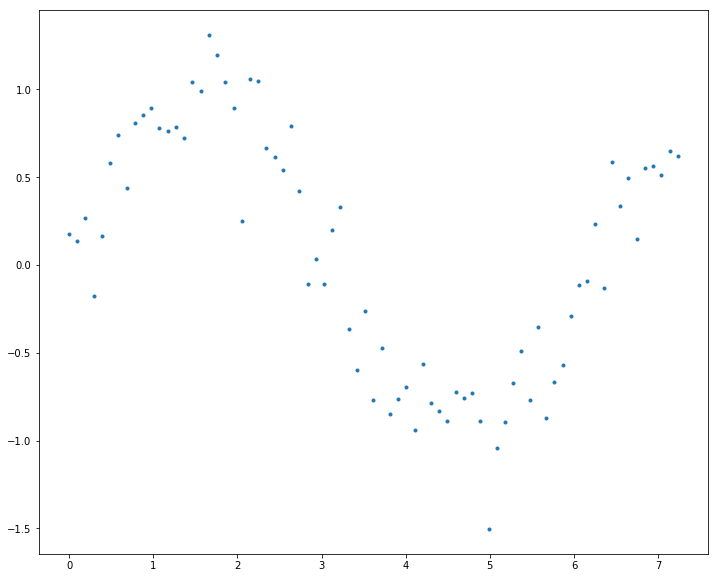

In [37]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

x = np.array([1.4*i*np.pi/180 for i in range(0,300,4)])
np.random.seed(20)  #随机数
y = np.sin(x) + np.random.normal(0,0.2,len(x))  #input dataset: 函数加上随机noise
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

In [38]:
data.head()

,x,y
0,0.000000,0.176779
1,0.097738,0.136756
2,0.195477,0.265742
3,0.293215,-0.179621
4,0.390954,0.164104


In [39]:
# build a complex variables, includes higher powers, x^2, x^3, ...
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print(data.head())

          x         y       x_2       x_3       x_4       x_5           x_6  \
0  0.000000  0.176779  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
1  0.097738  0.136756  0.009553  0.000934  0.000091  0.000009  8.717508e-07   
2  0.195477  0.265742  0.038211  0.007469  0.001460  0.000285  5.579205e-05   
3  0.293215 -0.179621  0.085975  0.025209  0.007392  0.002167  6.355064e-04   
4  0.390954  0.164104  0.152845  0.059755  0.023362  0.009133  3.570691e-03   

            x_7           x_8           x_9          x_10          x_11  \
0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1  8.520356e-08  8.327663e-09  8.139328e-10  7.955252e-11  7.775339e-12   
2  1.090606e-05  2.131882e-06  4.167336e-07  8.146178e-08  1.592389e-08   
3  1.863402e-04  5.463780e-05  1.602064e-05  4.697497e-06  1.377378e-06   
4  1.395975e-03  5.457617e-04  2.133676e-04  8.341686e-05  3.261214e-05   

           x_12          x_13          x_14          x_15  
0  0.000000e+0

In [194]:
# 复杂度可变
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

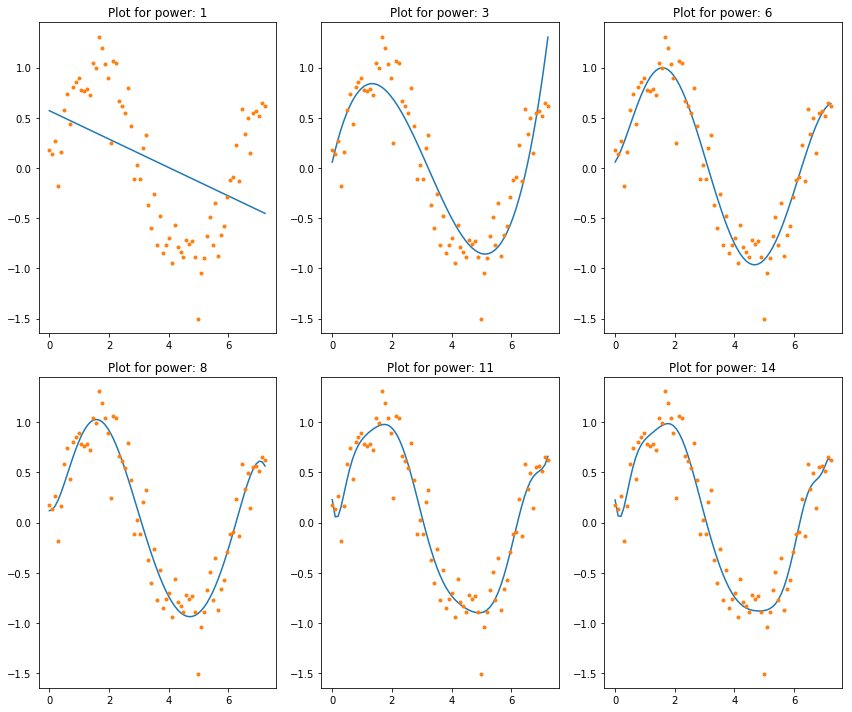

In [195]:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#定义作图的位置(231-236: 2by3 subplot index 1-6) 与模型的复杂度(model complexity-- highest powers are chosen to be 1,3,6,8,11,14)
#here we pick some powers to plot the graph (from below, power is 1-16, but we only plot these 6 powers)
models_to_plot = {1:231,3:232,6:233,8:234,11:235,14:236}

#画出来
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

To tell if the model above just fit or overfitting, use regularization methods below

#### 1. L2 norm: Ridge

In [196]:
from sklearn.linear_model import Ridge

def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True) # ridge regularization
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha]) #subplot position 231,...,236
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

/Users/crazychen/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.5970651807779897e-17 / 1.1102230246251565e-16
  RuntimeWarning)


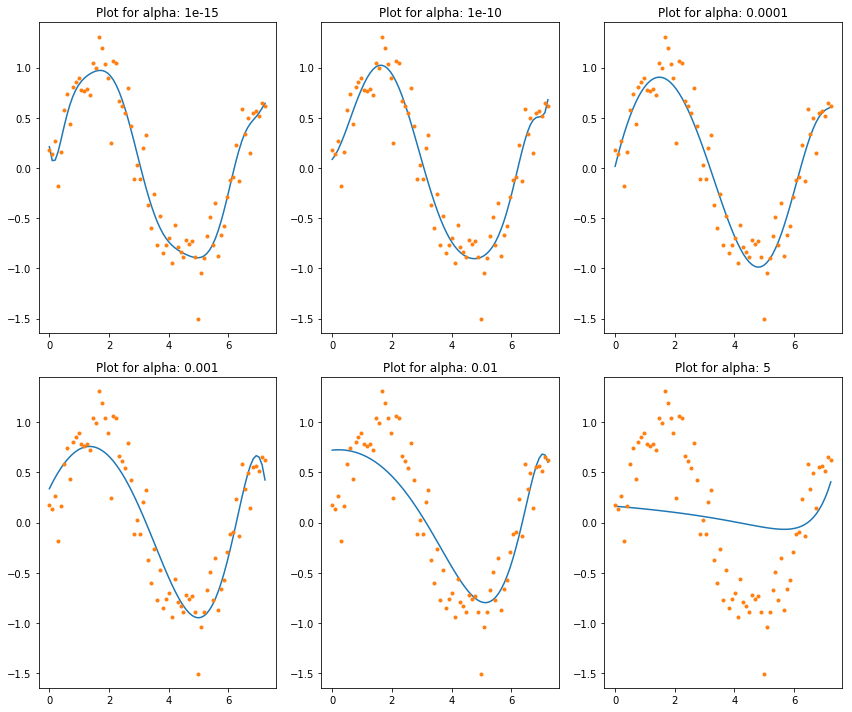

In [197]:
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested (explanation of alpha-- see picture in theoretical part note for Ridge)
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

#here we pick some alpha to analyze (from alpha ridge, there are 10 alphas, but we only analyze these 6)
models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}

for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

#### 2. L1 norm--Lasso

In [198]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

/Users/crazychen/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


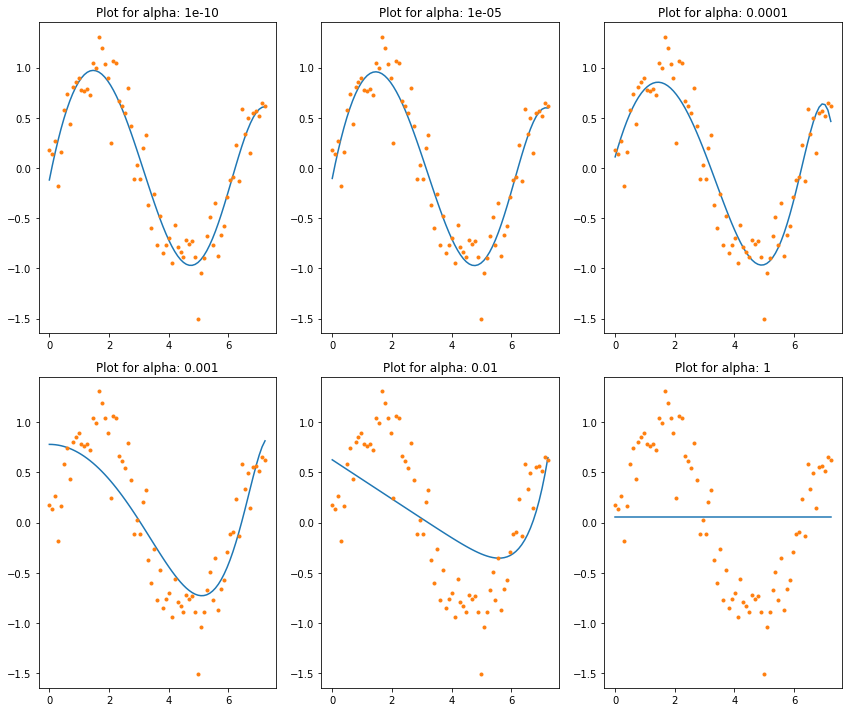

In [199]:
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

Conclusion: Lasso is easy to wipe out the variables (x1,x2...), so when alpha increases, weight on changing alpha increases, then it means the boundary shrinks, then it is easier to get beta_hat to be 0

## 4. pipeline

> practical, to use in working; make a pipeline to merge different processes...; just like get the input, then output from pipeline is the results we need

In [4]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [5]:
iris = load_iris()


In [6]:
#classifier_pipeline = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
pipeline = Pipeline([
    ('scaler',preprocessing.StandardScaler()),
    ('clf', LogisticRegression())
])

In [50]:
scores = cross_validation.cross_val_score(pipeline, iris.data, iris.target, cv=3)


In [51]:
scores


array([ 0.88235294,  0.92156863,  0.89583333])

In [12]:
pipeline.fit(iris.data,iris.target)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

## 5. 方差的分解-- just a review

<img src='SSESSRSST.png',width=700>


* $t_i(x)$或者$t(x)$是在x=x时的观测点值
* $y(x)$是在x=x时的回归值
\begin{equation*}
\sum(t_i(x) - y(x))^2 = SSE \\
\sum(y(x) - \bar{y})^2 = SSR \\
\sum(t_i(x) - \bar{y})^2 = SST
\end{equation*}
<img src='SSESSRSST_t.png',width=800>

## 6. bias与variance的分解 (纯理论，较难)
* 专注于残差平方和，沿用经典教材的记法(Jordan, M., Kleinberg, J., & Scho, B. (n.d.). Pattern Recognition and Machine Learning.)
* $t_i(x)$或者$t(x)$是在x=x时的观测点值-- actual value
* $y(x)$是在x=x时的回归值-- prediction value

每一点的loss function
\begin{equation*}
Loss = (y(x)-t_i(x))^2\\   
\end{equation*} 

整个sample 的mean(loss function)

\begin{equation*}
E[Loss]=\int\{y(x)-t(x)\}^2p(x,t)dtdx\\  
\end{equation*} 


* 引入 $h(x) = \int t(x)p(t|x)dt$ 代表$t$在$x=x$的总体期望值= population mean of y @x=x,一般是未知的
* 代入分解
\begin{equation*}
E[Loss]=\int\{y(x)-h(x)+h(x)-t(x)\}^2p(x,t(x))dtdx\\
=\int\{y(x)-h(x)\}^2p(x)dx+\int\{h(x)-t(x)\}^2p(x)dtdx + 2\int(y(x)-h(x))(h(x)-t(x))p(x,t(x))dtdx \\
=\int\{y(x)-h(x)\}^2p(x)dx+\int\{h(x)-t(x)\}^2p(x,t(x))dtdx \\
\end{equation*}

<img src='./2.jpg'>
note: population 绕h(x) 的波动= noise

<img src='EL.png',width=700>

From picture below: 
different times of sampling, we got different sample, then we can have different prediction of y at x=x. 

<img src='more_sample.png',width=700>

* 对于不同的样本集,求得的$y(x;D)$会不同
    * $y(x;D_1)$ 
    * $y(x;D_2)$
    * $y(x;D_3)$
    * $y(x;D_4)$
* $h(x)$是全样本(population)在x=x的期望，不会随抽样不同而改变
* 取样本集{D1,D2,D3,D4}的$y(x;D_i)$的期望- define: 
\begin{equation*}
E_D[y(x;D)] = expectation \ of \ y(x) \ over \ different \ sample \ sets \{D1,D2,D3,D4\} \\
\end{equation*}

* 将$E_D[y(x;D)]$引入 $\{y(x;D)-h(x)\}^2$ in E[L]

<img src='339.png',width=500>

 note: the last term can be simplified to 0, so we have the following 2 terms: i.e. 将E(L) 第一项拆成两份

<img src='./3.jpg'>

* 对不同的数据集D1,D2,D3,D4...求期望
<img src='340.png',width=500>

**bias**: reflects model prediction value's distance from h(x);

**variance**: reflects variance between predicted values from different sampling action

**noise**: is the population noises

also see below for conclusion in chinese

> note: these bias and variance are different from what is explained by Andrew Ng ML course, that course's bias and variance are more practical and easy understanding. 

* 代回$E[L]$
<img src ='341.png',width=600>

* 偏差：
    * **偏差**度量了学习算法的期望预测与真实结果的偏离程度, 刻画了<span style="color:blue">学习算法本身的拟合能力</span>
* 方差：
    * **方差**度量了同样大小的训练集的变动所导致的学习性能的变化, 刻画了<span style="color:blue">数据扰动所造成的影响</span>
* 噪音：
    * **噪声**表达了在当前任务上任何学习算法所能达到的期望泛化误差的下界, 刻画了<span style="color:blue">学习问题本身的难度</span>
    

<img src='bias_variance.png',width=700>

\begin{equation*}
E(loss) = \int \{E_D[y(x;D)]-h(x)\}^2p(x)dx + \int E_D[\{y(x;D)-E_D[y(x;D)\}^2]p(x)dx + \int \{h(x)-t\}^2p(x,t)dxdt
\end{equation*}
这里的方差和偏差重点在于 <span style="color:blue">在有若干训练数据集的情况下</span> 训练出模型的预测结果的期望值和方差

### Bias与Variance的两难之间
* 使用不同复杂度的模型，会影响bias与variance的分布
<img src='bias-variance-model-complexity.png',width=500>

[参考资料](http://scott.fortmann-roe.com/docs/BiasVariance.html)